In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import mlrose_hiive as mlrose

In [3]:
# BitString of Values for various things
values = [x for x in range(1, 101)]
nVals = len(values)

In [4]:
# Three Optimization Problem Domains (Fitness Functions) to Maximize


# Knapsack
# inplace
np.random.shuffle(values)
# random weights, one per known value
weights = np.random.randint(1, 10, size=nVals)
max_weight = .4
fitness_ks =  mlrose.Knapsack(weights, values, max_weight)
optimize_ks = mlrose.DiscreteOpt(nVals, fitness_fn=fitness_ks, maximize=True)

# 4 Peaks
fitness_4p = mlrose.FourPeaks(t_pct=0.2)
optimize_4p = mlrose.DiscreteOpt(nVals, fitness_fn=fitness_4p, maximize=True)

# Flip Flop
fitness_ff = mlrose.FlipFlop()
optimize_ff = mlrose.DiscreteOpt(nVals, fitness_fn=fitness_ff, maximize=True)

optimizations = [(optimize_ks, 'KnapSack'), (optimize_4p, 'FourPeaks'), (optimize_ff, 'FlipFlop')]

KnapSack
FourPeaks
FlipFlop


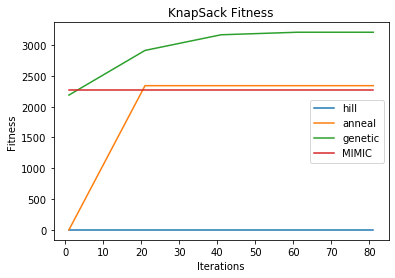

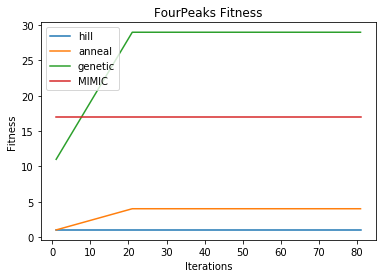

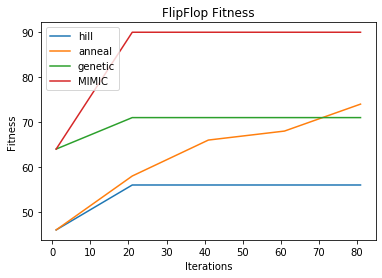

KnapSack


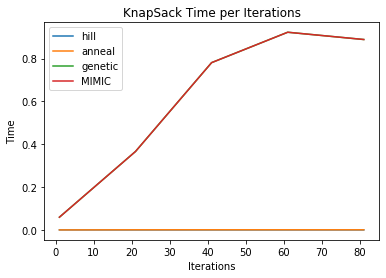

FourPeaks


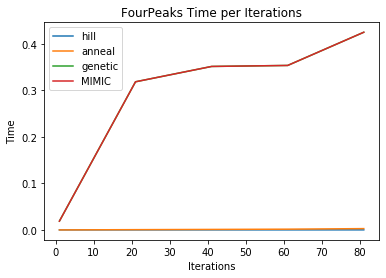

FlipFlop


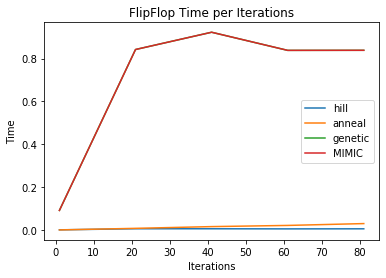

<Figure size 432x288 with 0 Axes>

In [6]:


results = {'iter':[],'try':[],'fit_score':[],'time':[], 'opt':[], 'algo': []}
seed = 100

for opt, optName in optimizations:
    print(optName)
    
    for i in range(1, 101, 20):
        for j in range(5, 25, 5):
            # Randomized Hill Climbing
            start = timeit.default_timer()
            best_state, best_fitness, best_curve = mlrose.random_hill_climb(
                opt, max_attempts=j, max_iters=i, random_state=seed)
            end = timeit.default_timer() - start
        
            results['opt'].append(optName)
            results['algo'].append('hill')
            results['iter'].append(i)
            results['try'].append(j)
            results['fit_score'].append(best_fitness)
            results['time'].append(end)
            
            # Simulated Annealing
            start = timeit.default_timer()
            best_state, best_fitness, best_curve = mlrose.simulated_annealing(
                opt, schedule=mlrose.ExpDecay(), max_attempts=j,
                max_iters=i, random_state=seed)
            end = timeit.default_timer() - start
            
            results['opt'].append(optName)
            results['algo'].append('anneal')
            results['iter'].append(i)
            results['try'].append(j)
            results['fit_score'].append(best_fitness)
            results['time'].append(end)
            
            
            #Genetic Algo
            start = timeit.default_timer()
            best_state, best_fitness, best_curve = mlrose.genetic_alg(
            opt, mutation_prob=0.1, max_attempts=j, max_iters=i, random_state=(5 * seed))
            end = timeit.default_timer() - start
            results['opt'].append(optName)
            results['algo'].append('genetic')
            results['iter'].append(i)
            results['try'].append(j)
            results['fit_score'].append(best_fitness)
            results['time'].append(end)
            
            #MIMIC
            best_state, best_fitness, best_curve = mlrose.mimic(
            opt, keep_pct = 0.2, max_attempts = j, max_iters = i, random_state=seed)
            results['opt'].append(optName)
            results['algo'].append('MIMIC')
            results['iter'].append(i)
            results['try'].append(j)
            results['fit_score'].append(best_fitness)
            results['time'].append(end)
            
            
results = pd.DataFrame(results)
   
            
plot_results(results)

In [5]:
def plot_results(results):
    # Plot Fitness Vs Iterations
    for opt in results['opt'].unique():
        results_opt = results.loc[results['opt'] == opt]
        for algo in results_opt['algo'].unique():
            algo_results = results_opt[(results_opt['algo'] == algo)]
            fitness_plot = algo_results[(algo_results['try'] == algo_results.loc[algo_results['try'].idxmin(),'try'])]
            plt.plot(fitness_plot['iter'], fitness_plot['fit_score'], label = algo)
        plt.title(opt + ' Fitness')
        plt.xlabel('Iterations')
        
        plt.ylabel('Fitness')
        plt.legend()
        plt.savefig('../images/' + opt + '_iter_v_fitness.png')
    
        plt.show()
        plt.clf()
        
    # Plot Time vs Iterations
    for opt in results['opt'].unique():
        print(opt)
        results_opt = results.loc[results['opt'] == opt]
        for algo in results_opt['algo'].unique():
            algo_results = results_opt[(results_opt['algo'] == algo)]
            fitness_plot = algo_results[(algo_results['try'] == algo_results.loc[algo_results['try'].idxmin(),'try'])]
            plt.plot(fitness_plot['iter'], fitness_plot['time'], label = algo)
        plt.title(opt + ' Time per Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Time')
        plt.legend()
        plt.savefig('../images/' + opt + '_time_v_iter.png')
    
        plt.show()
        plt.clf()
        
    